# Sparse Hebbian Learning: toward a quantitative measure of the quality of filters

We are interested here in learning the "optimal" components of a set of images (let's say some "natural", usual images). As there is no supervisor to guide the learning, this is called unsupervised learning. Our basic hypothesis to find the best ("optimal") components will be to assume that *a priori* the most sparse is more plausible. We will implement the derived algorithm in this set of scripts.



In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import pandas as pd

## experiments

To test and control for the role of different parameters, we will have a first object (in the [shl_experiments.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_experiments.py) script) that controls a learning experiment. It contains all relevant parameters, but can also keep a trace of the history of some statistics. This is useful to compare the relative efficiency of the different solutions.


In [3]:
do_random = True # draw new coeff at random
do_random = False # draw new coeff with bootstrap resampling?

do_double_shuffle = True # shuffle accross dictionary elements
do_double_shuffle = False # only shuffles 

l0_sparseness_noise = 200 #shl.n_dictionary #

In [4]:
tag = 'coding'
homeo_methods = ['None', 'HAP', 'HEH']


record_num_batches = 2**12

seed = 42
np.random.seed(seed)

from shl_scripts.shl_experiments import SHL
shl = SHL()
data = shl.get_data(matname=tag)
indx = np.random.permutation(data.shape[0])[:record_num_batches]

list_figures = []

dico = {}
for homeo_method in homeo_methods:
    print(15*'🐶' + homeo_method[:3] + 15*'🐶')
    shl = SHL(homeo_method=homeo_method)
    dico[homeo_method] = shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method)


🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶None🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HAP🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HEH🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶


## coding

The learning itself is done via a gradient descent but is highly dependent on the coding / decoding algorithm. This belongs to a another function (in the [shl_encode.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_encode.py) script)

In [5]:
from shl_scripts.shl_encode import sparse_encode
stick = np.arange(shl.n_dictionary)*shl.nb_quant
P_cum_zeroeffect = np.linspace(0, 1, shl.nb_quant, endpoint=True)[np.newaxis, :] * np.ones((shl.n_dictionary, 1))

for homeo_method in homeo_methods:
    shl = SHL(homeo_method=homeo_method)

    for P_cum_rec, gain_rec in zip([None, P_cum_zeroeffect, dico[homeo_method].P_cum], [np.ones(shl.n_dictionary), None, None]):
        sparse_code = sparse_encode(data[indx, :], dico[homeo_method].dictionary, P_cum=P_cum_rec, C=shl.C, 
                                     l0_sparseness=shl.l0_sparseness, gain=gain_rec)   

        # from shl_scripts.shl_tools import print_stats
        # SD, SE = print_stats(data[indx, :], dico[homeo_method].dictionary, sparse_code)

## Generating new coefficients by shuffling and decoding

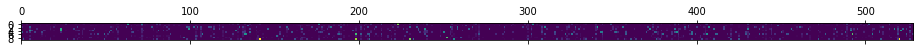

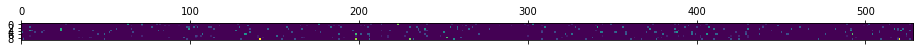

average non-zeros [2540  325  312  312  311 1835  202  434  231  661  391  281  620  398
  769  255  281 2345  225 2103  568  344  220  368  211  251 1377  203
  261  261  222  639 1192 1919 1638  260 1647 1245  282  496  827  830
  412  547  338  541  233  177  269  240 1097  408  218  282 1882  969
  832 3060  166  271  443  232  273  324  226 2588  231  592  715  509
  386 3354  771  664  363  242  375  233 1937  287 3203  932 1255 1590
 1666  225 1411  931  257  199  537  168  167  576 1081  316  296  179
  233  274  263  209  199 2942 2202  322 3317  203  299  238  208  337
 2538 1006  864  417  608 2386  329 2568]
average non-zeros [ 491  159  183  138  198  296  136  164  145  203  203  139  217  185
  234  167  151  356  157  336  175  183  153  194  154  159  261  139
  190  174  164  222  253  328  331  195  261  234  183  197  197  223
  163  241  144  221  170  149  137  163  251  227  167  156  296  231
  237  669  141  152  139  151  162  173  176  512  157  152  178  160

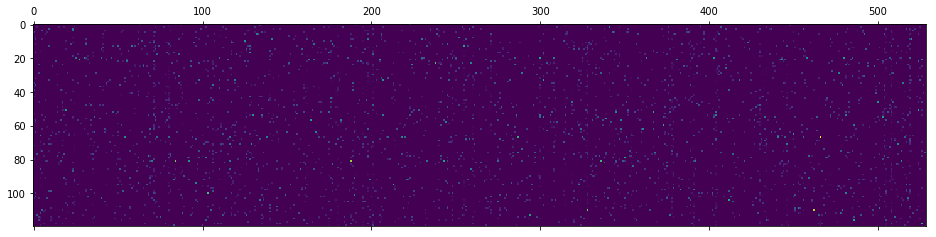

mean deviation of coefficients =  0.05507078832624565 0.03436558725714224 0.030932687584026793
total deviation of coefficients =  0.02269573878374076
mean deviation of quantiles =  0.006902903402202808
mean deviation of quantiles =  0.00665297669193539
total deviation of quantiles =  0.005541507561711527
ratio deviation of quantiles =  0.8027792421292117
proba incorrect coefficients =  0.153288929584121
proba incorrect coefficients (strong) =  0.04385162526583175


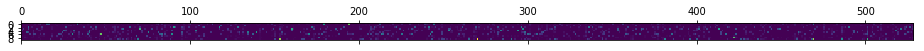

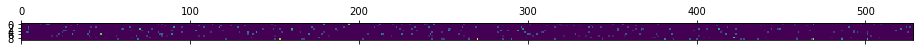

average non-zeros [1315  264  906  550  435  356  342 1932  543  734 1076 1381 1528  782
  437  404  382  315 2416  377  526  854  555  599  859  615 1777  482
  470 1770  682 2214  872  799 1472  366  516  476  936 1382 1015 1807
  488  586  634 1060 2442  361  321 1746 2611  628 1694  462  624 2793
  339 1931 1047  547 1273  406  439  936  364 2136  315 1543  668 1542
  512  580  449  420  648  429  506  542  827  406 2405 1120  721 2341
  442 2776 1338  722  761 1711  294  338  567  364  444 1690 1300  708
 1398 2163  724  398  661 1808 1166  477  724  862  483  348  530  553
  424  745  307  432  339  649  745  441]
average non-zeros [232 159 233 191 152 161 178 272 181 218 272 250 299 231 197 191 210 179
 324 202 160 204 214 204 169 164 264 192 242 211 197 373 220 186 264 161
 217 189 244 233 230 262 234 233 201 207 332 176 181 304 451 168 226 205
 224 420 181 225 216 205 208 188 188 202 185 307 179 274 244 253 188 218
 181 234 231 188 195 156 195 181 330 266 210 326 180 403 246 2

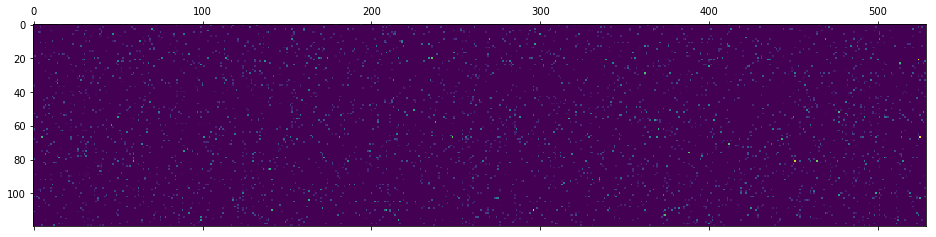

mean deviation of coefficients =  0.05954044366070242 0.033957787962182365 0.03163932382232799
total deviation of coefficients =  0.022639911600078208
mean deviation of quantiles =  0.006898847641349192
mean deviation of quantiles =  0.006818359029299352
total deviation of quantiles =  0.0053070622405211425
ratio deviation of quantiles =  0.7692679294310741
proba incorrect coefficients =  0.19269248803757089
proba incorrect coefficients (strong) =  0.04163497607514177


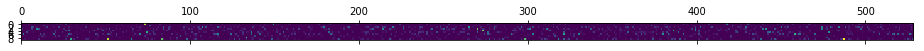

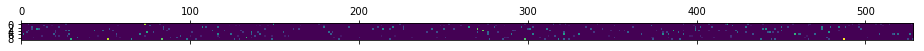

average non-zeros [ 879  766  904 1616 1260 1166 1333 1209 1729  714 1007 1234  968  683
  815  761 1043 1741 1570 1218 1275 1576 1658 1011 1165  800 1875 1096
 1636  985 1026  605 1196 1001 1010  714 1701  961  979  524  512 1169
 1274  725 1140 1944  569  690 1387  999 1039 1423 1003  972 1481  858
 1493 1495 1132  636 1434  859 1001 1367  971  785 1204  754  941 1901
 1926 1573  927  995 1074 1158 1451 1168 1270 1207  849  660  957  727
 1479 1095  986  719 1088  916  827 1103 1666  723 1053 1251 1223 1125
 1658 1507  881  762  900 1000  582 1104  752  713  987  968  680  833
  917 1093 1427  605  743  789  842  946]
average non-zeros [225 209 212 247 244 217 226 217 242 195 215 199 207 201 212 221 201 240
 225 206 238 272 245 230 251 179 257 179 235 236 228 183 231 219 245 197
 290 220 234 195 148 207 220 224 229 306 160 189 227 212 232 218 203 190
 270 188 281 271 232 164 272 209 252 231 202 237 245 192 230 225 261 243
 181 222 211 225 245 242 193 220 195 217 218 186 248 209 231 2

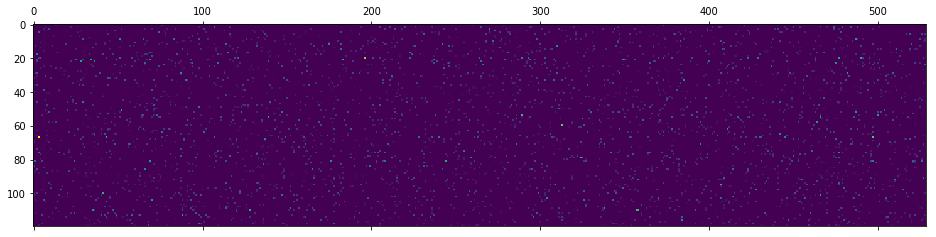

mean deviation of coefficients =  0.06395907846973996 0.034181627832087794 0.03205811726972113
total deviation of coefficients =  0.023463449845826254
mean deviation of quantiles =  0.0069005529665143
mean deviation of quantiles =  0.006862308457354774
total deviation of quantiles =  0.005328963412365892
ratio deviation of quantiles =  0.7722516497192732
proba incorrect coefficients =  0.23734760825259926
proba incorrect coefficients (strong) =  0.04180988967982047


In [6]:
def shuffling(data, sparse_code, dico, N_show=10):
    if do_random:
        from shl_scripts.shl_encode import inv_quantile, inv_rescaling
        sparse_code_bar = inv_rescaling(inv_quantile(dico.P_cum, np.random.rand(sparse_code.shape[0], sparse_code.shape[1])), C=shl.C)
    else:
        sparse_code = sparse_encode(data, dico.dictionary, P_cum=dico.P_cum, C=shl.C, 
                                     l0_sparseness=l0_sparseness_noise, gain=None)   

        sparse_code_bar = sparse_code.copy()
        
        sparse_code_bar = sparse_code_bar.T
        np.random.shuffle(sparse_code_bar)
        sparse_code_bar = sparse_code_bar.T
        
        if do_double_shuffle:
            np.random.shuffle(sparse_code_bar)

    plt.matshow(sparse_code_bar[:N_show, :])
    plt.show()

    def threshold(sparse_code, l0_sparseness):
        thr = np.percentile(sparse_code, 100 * (1 - l0_sparseness/shl.n_dictionary ), axis=1)
        return (sparse_code>thr[:, np.newaxis])

    sparse_code_bar_high = threshold(sparse_code_bar, shl.l0_sparseness) * sparse_code_bar
    plt.matshow(sparse_code_bar_high[:N_show, :])
    plt.show()
    return sparse_code_bar, sparse_code_bar_high

def pipeline(sparse_code_bar, sparse_code_bar_high, dico, index, N_show=120):

    patches_bar = sparse_code_bar @ dico.dictionary
    SD = np.sqrt(np.mean(patches_bar**2, axis=1))


    P_cum_rec = dico.P_cum
    gain_rec = None

    sparse_code_rec = sparse_encode(patches_bar, dico.dictionary, P_cum=P_cum_rec, C=shl.C, 
                                     l0_sparseness=shl.l0_sparseness, gain=gain_rec)   

    print('average non-zeros', np.count_nonzero(sparse_code_bar, axis=0)[:N_show])
    print('average non-zeros', np.count_nonzero(sparse_code_bar_high, axis=0)[:N_show])
    print('average non-zeros', np.count_nonzero(sparse_code_rec, axis=0)[:N_show])
    
    from shl_scripts.shl_tools import print_stats
    SD, SE = print_stats(patches_bar, dico.dictionary, sparse_code_rec, verbose=False, display=False)
    
    plt.matshow(sparse_code_rec[:N_show, :])
    plt.show()

    print('mean deviation of coefficients = ', np.mean(np.abs(sparse_code_bar)), np.mean(np.abs(sparse_code_bar_high)), np.mean(np.abs(sparse_code_rec)))
    print('total deviation of coefficients = ', np.mean(np.abs(sparse_code_bar_high-sparse_code_rec)))

    from shl_scripts.shl_encode import quantile, rescaling

    q_rec = quantile(dico.P_cum, rescaling(sparse_code_rec, C=shl.C), stick, do_fast=False)
    q_bar = quantile(dico.P_cum, rescaling(sparse_code_bar_high, C=shl.C), stick, do_fast=False)

    print('mean deviation of quantiles = ', np.mean(np.abs(q_bar)))
    print('mean deviation of quantiles = ', np.mean(np.abs(q_rec)))
    print('total deviation of quantiles = ', np.mean(np.abs(q_bar-q_rec)))
    print('ratio deviation of quantiles = ', np.mean(np.abs(q_bar-q_rec))/np.mean(np.abs(q_bar)))
    aerror = np.mean(np.abs(q_bar-q_rec))/np.mean(np.abs(q_bar))

    perror = 1 - np.mean( (sparse_code_bar>0) == (sparse_code_rec>0))
    print('proba incorrect coefficients = ', perror)

    perror_high = 1 - np.mean( (sparse_code_bar_high > 0) == (sparse_code_rec>0))
    print('proba incorrect coefficients (strong) = ', perror_high)
    
    return pd.DataFrame({'error':[(SD/SE).mean()],
                               'aerror':[aerror],
                               'perror':[perror],
                               'perror_high':[perror_high]
                                        },
                                index=[index])

record = None
for homeo_method in homeo_methods:
    shl = SHL(homeo_method=homeo_method)

    sparse_code_bar, sparse_code_bar_high = shuffling(data[indx, :], sparse_code, dico[homeo_method])
    record_ = pipeline(sparse_code_bar, sparse_code_bar_high, dico[homeo_method], index=homeo_method)
    if record is None:
        record = record_
    else:
        pd.concat([record, record_])


In [7]:
record

,aerror,error,perror,perror_high
None,0.802779,2.799094,0.153289,0.043852


In [8]:
record_

,aerror,error,perror,perror_high
HEH,0.772252,3.104697,0.237348,0.04181


## Version used

In [9]:
%load_ext version_information
%version_information numpy, shl_scripts, pandas

Software versions
Python 3.6.4 64bit [GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)]
IPython 6.2.1
OS Darwin 17.4.0 x86_64 i386 64bit
numpy 1.14.1
shl_scripts 20171221
pandas 0.22.0
Sat Mar 17 22:05:28 2018 CET